# Hamiltonian Monte Carlo<br><sub>Not quite NUTS but just unhinged enough to give you the right ideas</sub><!-- https://www.johndcook.com/t_normal_mixture.pdf -->

<!--
$\begin{align}
\frac{1}{\sqrt{2\pi}} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)}  \int  e^{-\frac{1}{2}\tau_i(y_i^2 + \nu) } \tau_i^{\frac{\nu+1}{2}-1} d\tau_i &={} \frac{1}{\sqrt{2\pi}} \frac{\sqrt{\frac{\nu}{2}}}{\sqrt{\frac{\nu}{2}}} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \Gamma \left(\frac{\nu+1}{2}\right) \left(\frac{y_i^2 + \nu}{2}\right)^{-\frac{\nu+1}{2}} \\
&={} \frac{1}{\sqrt{\pi\nu}}  \frac {\frac{\nu}{2}^{\frac{\nu+1}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \Gamma \left(\frac{\nu+1}{2}\right) \left(\frac{y_i^2 + \nu}{2}\right)^{-\frac{\nu+1}{2}}\\
&={} \frac{1}{\sqrt{\pi\nu}}  \frac{\Gamma \left(\frac{\nu+1}{2}\right)}{\Gamma \left(\frac{\nu}{2}\right)} \frac{\nu}{2}^{\frac{\nu+1}{2}} \left(\frac{y_i^2 + \nu}{2}\right)^{-\frac{\nu+1}{2}}\\
&={} \frac{1}{\sqrt{\pi\nu}}  \frac{\Gamma \left(\frac{\nu+1}{2}\right)}{\Gamma \left(\frac{\nu}{2}\right)} \left(\frac{y_i^2}{\nu} + 1\right)^{-\frac{\nu+1}{2}}
\end{align}$
-->

## Hamiltonian Dynamics

Consider the **negative log joint probability distribution** for random varialbes $\theta$ and $v$ with $\dim(v)=\dim(\theta)$ 

$$\Large
\begin{align}
- \log p(\theta, v) = {} & - \log p(\theta) p(v|\theta)   \\
 = {} & - \log p(\theta) - \log p(v|\theta)   \\
H(\theta, v) = {} & U(\theta) + K(v|\theta) \\
\text{often simplified to } \Longrightarrow \quad = {} & U(\theta) + K(v) \quad \textrm{ by assuming } \quad  \theta \perp\!\!\!\perp v
\end{align}$$

> You care about sampling value from $\theta$ but $v$ is a completely **auxilliary variable** that you just made up and augmented $\theta$ through $K(v|\theta)$ which which probably just independent $K(v)$

#### <u>Physics people:</u>

This will define a **hamiltonian dynamics system** which decomposes the **total energy** $H(\theta, v)$ into 
- **potential energy** $U(\theta)$ and 
- **kinetic energy** $K(v)$, which is often called **momentum** or **velocity**

if it is defined to evolve according to differential equations 

$$\Large \begin{align*} 
\frac{d\theta}{dt} & = {} \frac{dH}{dv} & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta}\\
\end{align*}$$

which induce the **law of conservation of energy**


#### <u>Statistics people:</u>

The **energies** $\theta_0 \overset{time}{\rightarrow} \theta_t$ and $v_0 \overset{time}{\rightarrow} v_t$ evolve over time but the **total energy**, defined to be the log joint density $\log p(\theta_0, v_0\color{gray}{|x}) = \log p(\theta_t, v_t\color{gray}{|x})$ remains constant

#### <u>Physics people:</u>

The variables $\theta$ and $v$ are evolved over time so the **potential** $U(\theta)$ and **kinetic** $K(v)$ **energy** are always inversely synchronized and the **total energy** remains constant

#### <u>Statistics people:</u>

You're walking on the countours of a distribution

- [Radford Neal "MCMC using Hamiltonian dynamics"](https://arxiv.org/pdf/1206.1901)
- [Michael Betancourt "A Conceptual Introduction to Hamiltonian Monte Carlo"](https://arxiv.org/pdf/1701.02434)
- [Alex Rogozhnikov "Hamiltonian Monte Carlo explained"](https://arogozhnikov.github.io/2016/12/19/markov_chain_monte_carlo.html)

### Normal Energy

If $p(\theta, v)$ is an **isotropic bivariate normal distribution** then 

$$H(\theta, v) = \log p(\theta, v) \overset{\large \theta \perp\!\!\!\perp v}{=} \log[p(\theta)q(v)] = \log p(\theta) + \log q(v) = U(\theta) + K(v) = \frac{1}{2}\theta^2 +\frac{1}{2}v^2$$

and **conservation of energy** $U(\theta) + K(v)$ is achieved if 

\begin{align} \frac{d\theta}{dt} & = {} \frac{dH}{dv} & \frac{dv}{dt} & = {}  -\frac{dH}{d\theta} \\ & = {} \frac{dK}{dv} = v & & = {}   -\frac{dU}{d\theta}= -\theta  \end{align}

## Differential Equations

The paths of $\theta$ and $v$ which which satisfy these differential equations have the form

$$
\begin{align}
\theta_t &={} r \cos(a + t)  & v_t  &={} -r \sin(a + t)\\
\frac{d}{dt}\theta_t  &={} -r \sin(a + t)   & \frac{d}{dt} v_t  &={} -r \cos(a + t)\\
 &={} v_t &  &={} - \theta_t
\end{align}
$$

and they evolve $\theta_t$ and $v_t$ on the contours of a unit circle (which are the contours of an isotropic bivariate normal distribution).


In [ ]:
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt

In [ ]:
# for example
r,a = 1,0 
t = np.linspace(0,10,1000)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9,4));

ax[0].plot(r*np.cos(a+t), label='$\\theta_t$')
ax[0].plot(-r*np.sin(a+t), label='$v_t$')
ax[0].legend()

ax[1].plot(np.cos(t), -np.sin(t), 'k')
ax[1].set_xlabel('$\\theta_t = \\cos(t)$')
ax[1].set_ylabel('$v_t = -\\sin(t)$')
ax[1].set_aspect('equal', adjustable='box') 

plt.tight_layout()

## Symplectic Integration<br>(discretely approximated differential equations)


> These processes are referred to as integration because they compute a summation series just like how Riemann sums add up areas under a curve (or how Monte Carlo integration estimates this by averaging up "randomly sampled points" of the curves height). Indeed, solutions to differential equations must be the integrals of the functions which when differentiated solve the equations. 


The following numerically approximate the solution trajectory of differential equations.

1. ***Euler's method***: not a ***symplectic integrator***

$$\begin{align} 
\theta_{t+\epsilon} & = {} \theta_t + \epsilon \frac{d\theta_t}{d t} &
v_{t+\epsilon} & = {} v_t + \epsilon \frac{dv_t}{d t}\\
& = {} \theta_t + \epsilon v_t &
& = {} v_t - \epsilon \theta_t
\end{align}$$


2. ***Euler's method*** (***improved variant***): a ***first order symplectic integrator***

$$\begin{align} 
\theta_{t+\epsilon} & = {} \theta_t + \epsilon \frac{d\theta_t}{d t} & 
v_{t+\epsilon} & = {} v_t + \epsilon \frac{dv_{t+\epsilon}}{d t}\\
& = {} \theta_t + \epsilon v_t &
& = {} v_t - \epsilon \theta_{t+\epsilon}
\end{align}$$


3. The ***leapfrog method*** (or ***leapfrog integration***): a  ***second order symplectic integrator***

$$\begin{align} 
\theta(t+\epsilon/2) & = {} \theta_t + \frac{\epsilon}{2} \frac{d\theta_t}{d t} &
v_{t+\epsilon} & = {} v_t + \epsilon \frac{dv_{t+\epsilon/2}}{d t} &
\theta_{t+\epsilon} & = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} \frac{d\theta_{t + \epsilon}}{d t}\\
& = {} \theta_t + \frac{\epsilon}{2} v_t&
& = {} v_t - \epsilon \theta_{t+\epsilon/2}&
& = {} \theta(t + \epsilon/2) + \frac{\epsilon}{2} v_{t+\epsilon}
\end{align}$$



In [ ]:
t = np.linspace(0,2*np.pi, 100)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,8)) 

for i in range(3):
    ax[i].plot(np.cos(t), -np.sin(t), 'k')
    ax[i].set_aspect('equal', adjustable='box')
    
ax[0].set_title("Euler's Method (not Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .3
for i in range(20):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t
    ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=5) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon 

ax[1].set_title("Modified Euler's (First Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .75
for i in range(50):
    v_t_e = v_t - epsilon * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    ax[1].plot([theta_t, theta_t_e], [v_t, v_t_e]) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    
ax[2].set_title("The Leapfrog Method (Second Order Symplectic)")
theta_t, v_t, t, epsilon = 0, 1, 0, .1
for i in range(50):
    v_t_e = v_t - epsilon / 2 * theta_t
    theta_t_e = theta_t + epsilon * v_t_e
    v_t_e = v_t_e - epsilon / 2 * theta_t_e
    ax[2].plot([theta_t, theta_t_e], [v_t, v_t_e], linewidth=10) 
    theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon

## Hamiltonian Monte Carlo<br><sub>Remember Metropolis-Hastings...</sub>


To produce draws from $p(x^{(t)})$ samples from a **proposal distribution** $\tilde x^{(t)} \sim q(\tilde x^{(t)}|x^{(t-1)})$ and "flip a coin" to accept or reject the proposal according to 

$x^{(t)} = \left\{\begin{array}{ll}
\tilde x^{(t)} & \text{with probability } \min\left(1,\frac{p(\tilde x^{(t)})}{p(x^{(t-1)})}\frac{q(x^{(t-1)}|\tilde x^{(t)})}{q(\tilde x^{(t)}|x^{(t-1)})}\right) \quad \color{gray}{\begin{array}{c}\textrm{... is the normalizing constant needed for $p$?}\\\textrm{... and what happens if $q$ is symmetric?}  \end{array}}\\
x^{(t-1)} & \text{otherwise}
\end{array}\right.$

---

1. Randomly sampling a number of discrete approximation steps (from some discrete distribution you choose)


2. Evolve to $\theta_t$ and $v_t$ with **symplectic integration** to create a **Metropolis-Hastings** proposal distribution $\tilde p( \theta_t,  v_t|\theta_0,v_0)$ with an **aceptance probability** of $1$

  $$\require{cancel}\min\left(1,\cancel{\frac{p( \theta_t,  v_t|x)}{p(\theta_0,v_0|x)}}^1\cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1\right)$$ 

  assuming 
  1. proposals $ \theta_t$ and $ v_t$ are on the same **contour** of the **log joint probability distribution** as initial values $\theta_0$ and $v_0$ (so the first ratio cancels) 
  2. and the symplectic integration is **reversibly symmetric** (so the second ratio cancels)
  
  <u>*Pause: do not yet accept this transition.*</u>


3. **Symmetrically randomly** perturb the **momentum** $v_t$ to $v_t+\epsilon$ to incease or decrease the overall **energy** up or down to higher or lower levels of the contours of the **log joint probability distribution** and accept now accept the full **Metropolis-Hastings** proposal with an **aceptance probability** of 

   $$\require{cancel}\min\left(1,{\frac{p( \theta_t, v_t+\epsilon|x)}{p(\theta_t,v_t|x)}}\cancel{\frac{\tilde q(\theta_t,v_t)|\theta_t,v_t+\epsilon)}{\tilde q(\theta_t,v_t+\epsilon| \theta_t,  v_t)}}^1 \cancel{\frac{ \tilde p(\theta_0,v_0| \theta_t,  v_t)}{\tilde p( \theta_t,  v_t|\theta_0,v_0)}}^1 \right)$$

  where the second proposal distribution $\tilde q(\theta_t,  v_t+\epsilon|\theta_t,v_t)$ ratio cancels due to the symmetry.


In [ ]:
t = np.linspace(0,2*np.pi, 100); 
fig,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(np.cos(t), -np.sin(t))
ax[0].set_aspect('equal', adjustable='box')
ax[1].set_aspect('equal', adjustable='box')
ax[0].set_title("(Second Order Symplectic) Leapfrog Method")
ax[1].set_title("Exponentiated Energy Distribution")
ax[2].set_title("Marginal Distribution of Interest")

theta_t, v_t, t, epsilon = 0, 1, 0, .1; 

m = 1000
theta_ts = np.zeros(m)
v_ts = np.zeros(m)

plotting = 50
accept = 0
for j in range(m):
    
    v_t_prop = v_t + stats.norm(scale=0.5).rvs()
    MH_acceptance_probability = \
    min(1,stats.norm().pdf(v_t_prop)/stats.norm().pdf(v_t))
    if stats.uniform().rvs()<MH_acceptance_probability:
        v_t = v_t_prop
        accept += 1

    for i in range(stats.poisson(15).rvs()):
        v_t_e = v_t - epsilon / 2 * theta_t
        theta_t_e = theta_t + epsilon * v_t_e
        v_t_e = v_t_e - epsilon / 2 * theta_t_e
        if j < plotting:
            ax[0].plot([theta_t, theta_t_e], [v_t, v_t_e], color=['r','k'][i%2]) 
        theta_t, v_t, t = theta_t_e, v_t_e, t+epsilon
    if j < plotting:
        ax[0].scatter(theta_t, v_t, s=50, color='orange');
        
    theta_ts[j] = theta_t
    v_ts[j] = v_t
        
ax[1].scatter(theta_ts, v_ts)
ax[2].hist(theta_ts, density=True)
ax[2].plot(sorted(theta_ts), stats.norm().pdf(sorted(theta_ts)))
accept/m

### Hamiltonian Monte Carlo is just smart Metropolis-Hastings<br>that might actually work in high dimensions<br><sub>Random perturbations in high dimesions just like uniform random samples in high dimensions<br>will not land on the density of interest... high dimensional space is too big...</sub>


## High Dimensional Space is Big and Weird and Not What You Think It Is (Part A)

In [ ]:
# target
p_x_pdf = lambda x: stats.norm().pdf(x)
mh_tuning_parameter = 1.25
q_xt_given_xtm1 = lambda x: stats.norm(x, scale=mh_tuning_parameter)
proposal_distribution = q_xt_given_xtm1

m = 1000
x = np.zeros(m)
rejections = 0
for t in range(1,m):
    x_tilde = proposal_distribution(x[t-1]).rvs()
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[t-1]))
    if stats.uniform().rvs() < acceptance_probability:
        x[t] = x_tilde
    else:
        x[t] = x[t-1]
        rejections += 1

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x)
ax[1].hist(x, density=True)
x_support = np.linspace(-4,4,301)
ax[1].plot(x_support, p_x_pdf(x_support));

In [ ]:
# target `stats.multivariate_normal?`
D = 20
p_x_pdf = lambda x: stats.multivariate_normal(mean=np.zeros(D),cov=np.eye(D)).pdf(x)
mh_tuning_parameter = 0.1
q_xt_given_xtm1 = lambda x: stats.multivariate_normal(mean=x, cov=mh_tuning_parameter*np.eye(D))
proposal_distribution = q_xt_given_xtm1

m = 10000
x = np.zeros((D,m))
rejections = 0
for t in range(1,m):
    x_tilde = proposal_distribution(x[:,t-1]).rvs()
                                    # MVN is still a symmetric proposal
    acceptance_probability = min(1, p_x_pdf(x_tilde)/p_x_pdf(x[:,t-1]))  
    if stats.uniform().rvs() < acceptance_probability:
        x[:,t] = x_tilde
    else:
        x[:,t] = x[:,t-1]
        rejections += 1

fig,ax = plt.subplots(2,2,figsize=(10,5))

demo = 100
demo_D = 3
for d in range(demo_D):
    ax[0,0].plot(x[d,:demo])
    ax[0,1].hist(x[d,:], density=True, alpha=0.5)
    ax[1,0].plot(x[d,:demo], x[d,1:(demo+1)], '.')
    
    max_k = 100
    autocorrelations = np.ones(max_k)
    for k in range(1,max_k):
        autocorrelations[k] = np.corrcoef(x[d,:-k:k],x[d,k::k])[0,1]
    ax[1,1].plot(autocorrelations, label="n_eff = %.2f"%(m/(1+2*autocorrelations.sum())))
    
ax[0,0].set_title("%.2f"%(100*rejections/m)+"% rejections"+" (%1.f/"%rejections+"%1.f)"%m)
ax[1,1].set_title("autocorrelation plots")
ax[1,0].set_title("$\\theta_t$ versus $\\theta_{t+1}$")
ax[1,1].legend()
x_support = np.linspace(-4,4,301)
ax[0,1].plot(x_support, stats.norm().pdf(x_support))
plt.tight_layout()        

In [ ]:
import pymc
import arviz as az

In [ ]:
mvn_model = pymc.Model()

with mvn_model:

    target = pymc.MvNormal('target', mu=np.zeros(D), cov=np.eye(D))
    
m = 10000
with mvn_model:

    idata = pymc.sample(draws=int(m/4), chains=4, tune=1000)

az.plot_trace(idata)
plt.tight_layout()    

In [ ]:
az.summary(idata, round_to=5)

In [ ]:
c,d = 0,0
plt.plot(idata.posterior.target.values[c,:-1,d], 
         idata.posterior.target.values[c,1:,d], '.', alpha=0.25);

In [ ]:
az.plot_energy(idata);

## High Dimensional Space is Big and Weird and Not What You Think It Is (Part B)

In [ ]:
# Here's a conceptual visualization of what a multivariate normal
# distribution is going to look like in high dimensions: a "bubble"
x_grid = np.linspace(-3,3,1000)
x,y = np.meshgrid(x_grid,x_grid)
tmp = (x**2+y**2)**.5*stats.multivariate_normal(mean=[0,0]).pdf(np.array([x.ravel(),y.ravel()]).T).reshape(1000,1000)
plt.imshow(tmp)
plt.xticks(np.linspace(0,1000,7), np.linspace(-3,3,7)); plt.yticks(np.linspace(0,1000,7), np.linspace(-3,3,7));

In [ ]:
# You can see that the "mass" of a "mound" shape in higher dimensions is actually spherical by
# looking at the distribution of distances from the mean of the sample vectors (x**2).sum()**0.5
plt.figure()
n = 100000
for D in [2,5,10,15,20]:
    f = stats.multivariate_normal([0]*D)
    x = f.rvs(n)
    plt.hist((x**2).sum(axis=1)**0.5, density=True, alpha=0.5,
             label="D="+str(D)+" with average distances "+str(round(((x**2).sum(axis=1)**0.5).mean(),3)))
plt.legend();

### The MAP an MLE<br><sub></sub>can be bad estimators

If the MLE estimates the expectation of a distribution I take it back (and sorry for being so, ahem, **MEAN** to your favorite estimator gosh geez) 

But consider that the posterior (parameter belief model) distribution is going to be some sort of spherical "bubble" shape distribution
- since the posterior generally has a "mound" shape

and that the MAP estimator is not remotely "usual" or "typical" relative to the **typical set** (which looks like a "bubble")
- and the MAP estimator is not goign to be "in the middle or center" of the "bubble" unless the "bubble" is perfectly sphereically symmetric (which might be the case for parameters like $\theta$ but how about for parameters like $\tau$?)

### Posterior expectation is a good estimator<br>averaging over the plausible values according to our (parameter belief) uncertainty<br>so our predictions are based on "the average" of what's "usual" or "typical"

$$\Large E[\theta|x] = \int \theta p(\theta|x)d\theta \approx \frac{1}{m} \sum_{t=1}^m \theta^{(t)} \quad \textrm{ for } \quad \theta^{(t)}\sim p(\theta|x)$$

The **posterior predictive distribution** (shown here for a normal distribution data model) is 

$$\LARGE f(\tilde x|x) = \int N(\tilde x|\theta,\tau) p(\theta,\tau|x)d\theta d\tau$$


with 

$$\Large E_{f(\tilde X|x)}[\tilde x] = \frac{1}{m} \sum_{t=1}^m  \tilde x^{(t)} \quad \textrm{ for } \quad \tilde x^{(t)} \sim N(\theta^{(t)},\tau^{(t)}) \quad \textrm{ for } \quad  (\theta^{(t)}, \tau^{(t)}) \sim p(\beta, \tau|x)$$


## Now that you know<br><sup>High Dimensional Space is Big and Weird and Not What You Think It Is</sup><br>but know that it needs to be treated with care let's do<br>High Dimensional Space is Big <span style="color:gray">and Weird and Not What You Think It Is</span> (Part C): <u>runtime and divergences</u>

The diagnostics we have seen to be available so far are

- Rejection rate
- Effective sample size
- Energy

but there are two more that are extremely useful

- Runtime
    - The **step size** of our **symplectic integrator**, and the number of **discrete approximation** steps we take
        - determines how far away from our current value we can travel
            - and hence determines how much autocorrelation we will have in our Markov chains
    - The "tuning" that PyMC NUTS algorithm does is to determine the **step size** and number of **discrete approximation** steps the most effectively achieves a **targetted acceptance rate** 
        - with a default target of an 80% acceptance rate is thought to be a good rule of thumb
    - The PyMC NUTS algorithm is interesting in that "the harder the problem" the
        - the SMALLER **step size** and the GREATER the number of **discrete approximation** steps it requires
            - and hence the more computation it requires
                - so the slower the run time the "the harder the problem" is
- Divergences
    - The **symplectic integration** is "falling off the contour" 
        - which is easy to do because, remember, high dimensional space is big
            - so even very small **discrete approximation** steps might be too big...
        - so SMALLER **step size** are required and a GREATER the number of **discrete approximation** steps are required...
    - And/But this **divergences** issue happens only in areas of the density with so-called **high curvature**
        - so the sampler is tuned to work well on most of the density which likely DOES NOT have **high curvature**
        - but then it performs poorly and creates many **divergences** when it arrives in parts of the density with **high curvature**
        
    - If **divergences** due to **high curvature** are common then the algorithm will be tuned to have SMALLER **step size** and a GREATER the number of **discrete approximation** steps, making it have a slower **runtime**
    - If **divergences** still exist then a balance has not been achieved (and it may not be possible to achieve) so sampling will remain problematic in **high curvature** regions of the target density

### Eight Schools

[Eight Schools](https://www.pymc.io/projects/examples/en/latest/diagnostics_and_criticism/Diagnosing_biased_Inference_with_Divergences.html#the-eight-schools-model) is the classical example of a hierarchical "random effects" Bayesian model.

- The 8 schools have different average levels of achievement ($y$)

- but also different uncertainty in their estimation ($\sigma$)



In [ ]:
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

with pymc.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pymc.Normal("mu", mu=0, sigma=5)
    tau = pymc.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pymc.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that the theta density evalution of theta above can change rapidly 
    # as a function of tau  meaning that the energy has "high curvature"

    # likelihood where observed information enters into the model
    obs = pymc.Normal("obs", mu=theta, sigma=sigma, observed=y)
    
pymc.model_to_graphviz(Centered_eight)    

> This hierarchy seeks to estimate "true levels of achievement" $\theta_i$ given ($\sigma_i$) noisy observation $y_i$ assuming that there's some variabiltiy over $\theta_i$ but all come from the same (normal) "random effects" distribution with unknown mean and variance.
>
> Inference will consist of posterior distributions for $\theta_i$ (and a normal distributional characterization of these 8 values given by posterior distributions over $\mu$ and $\tau$).

In [ ]:
with Centered_eight:
    fit_C = pymc.sample(5000, chains=2, tune=1000, idata_kwargs={"log_likelihood": True})


In [ ]:
tau = fit_C.posterior.tau.values.ravel()
diverging = fit_C.sample_stats.diverging.values.ravel()

plt.plot(tau[:-1], tau[1:], 'k.', alpha=0.1)
divcount = 0
for i,div in enumerate(diverging[:-1]):
    if div:
        if divcount==0:
            plt.plot(tau[i], tau[i+1], 'r.', alpha=0.5, label="Divergences")
            divcount += 1
        plt.plot(tau[i], tau[i+1], 'r.', alpha=0.5)
plt.xlabel("tau[t]")
plt.ylabel("tau[t+1]")
#plt.xlim([0,5])
#plt.ylim([0,5])
plt.legend();

In [ ]:
from matplotlib import cm
gra = cm.get_cmap('viridis', 100)

a = fit_C.sample_stats.acceptance_rate.values.ravel()
cutoff=0.4
plt.scatter(tau[:-1][a[:-1]>cutoff], tau[1:][a[:-1]>cutoff], 
            color=gra(a[:-1][a[:-1]>cutoff]), alpha=0.5)
for i,ai in enumerate(a[:-1]):
    if ai<=cutoff:
        plt.scatter(tau[i], tau[i+1], color=gra(ai))

plt.scatter(tau[:-1][a[:-1]<=cutoff], tau[1:][a[:-1]<=cutoff], color=gra(a[:-1][a[:-1]<=cutoff]))
plt.title("Acceptance Rate")
plt.xlabel("tau[t]")
plt.ylabel("tau[t+1]")
plt.colorbar();


In [ ]:
plt.plot(tau, 'k.', alpha=0.1)
divcount = 0
for i,div in enumerate(diverging):
    if div:
        if divcount==0:
            plt.plot(i,tau[i], 'r.', label="Divergences")
            divcount += 1
        plt.plot(i, tau[i], 'r.',)
plt.title('tau draws')
plt.legend();

In [ ]:
fit_C

In [ ]:
fit_C.sample_stats

In [ ]:
fig,ax = plt.subplots(3,3,figsize=(10,10))
ax = ax.ravel()
look_at = np.array(list(fit_C.sample_stats.keys()))
look_at = look_at[[0,2,3,7,12,14]]
for i,info in enumerate(look_at):
    ax[i].hist(fit_C.sample_stats[info].values.ravel()[~diverging], 
               density=True, alpha=0.5, label='No divergence')
    ax[i].hist(fit_C.sample_stats[info].values.ravel()[diverging], 
               density=True, alpha=0.5, label='Divergence')
    ax[i].set_title(info)
    ax[i].legend()

ax[-2].hist(fit_C.log_likelihood.obs.values.sum(axis=-1).ravel()[~diverging], 
            density=True, alpha=0.5, label='No divergence')
ax[-2].hist(fit_C.log_likelihood.obs.values.sum(axis=-1).ravel()[diverging], 
            density=True, alpha=0.5, label='Divergence')
ax[-2].set_title("log_likelihood")

plt.tight_layout()

In [ ]:
mu = fit_C.posterior.mu.values.ravel()
plt.plot(mu, 'k.', alpha=0.1)
divcount = 0
for i,div in enumerate(diverging):
    if div:
        if divcount==0:
            plt.plot(i,mu[i], 'r.', label="Divergences")
            divcount += 1
        plt.plot(i, mu[i], 'r.',)
        
plt.title('mu draws')
plt.legend();

In [ ]:
fig,ax = plt.subplots(2,4,figsize=(20,10))
ax = ax.ravel()

for j in range(J):
    theta_j = fit_C.posterior.theta.values[:,:,j].ravel()
    ax[j].plot(theta_j, 'k.', alpha=0.1)
    divcount = 0
    for i,div in enumerate(diverging):
        if div:
            if divcount==0:
                ax[j].plot(i,theta_j[i], 'r.', label="Divergences")
                divcount += 1
            ax[j].plot(i, theta_j[i], 'r.',)
            
    ax[j].set_title('theta '+str(j)+' draws')        
    ax[j].legend()
      

In [ ]:
theta_prec = 1/fit_C.posterior.theta.values.var(axis=-1).ravel()
plt.plot(theta_prec, 'k.', alpha=0.1)
divcount = 0
for i,div in enumerate(diverging):
    if div:
        if divcount==0:
            plt.plot(i,theta_prec[i], 'r.', label="Divergences")
            divcount += 1
        plt.plot(i, theta_prec[i], 'r.',)

plt.title('precision of theta draws')
plt.legend();

In [ ]:
plt.plot(tau,theta_prec,'k.',alpha=0.05)
plt.plot(tau[diverging],theta_prec[diverging], 'r.', label="Divergences", alpha=0.25)
plt.xlabel('tau')
plt.ylabel('precision of thetas');

In [ ]:
mu = fit_C.posterior.mu.values.ravel()
thetaS = fit_C.posterior.theta.values.reshape(10000,8)
theta = fit_C.posterior.theta.values
for i in range(0,len(mu)-1):
    if diverging[i]:
        s = max(tau[i]**-0.5, thetaS[i,:].std())
        support = np.linspace(mu[i]-2*s, mu[i]+2*s, 100)
        plt.plot(support,stats.norm(mu[i],tau[i]**-0.5).pdf(support), label="What tau wants")
        plt.plot(support,stats.norm(mu[i],thetaS[i,:].std()).pdf(support), ':', label="What thetaS want")
        plt.plot(thetaS[i,:],0*thetaS[i,:],'k.')
        #for j in range(J):
        #    plt.plot(theta[:,:,j].ravel()[i],0,'r.')
        print(i)
        plt.legend()
        plt.title("High curvature as small changes in tau rapidly change energy (density)")
        break


In [ ]:
# The many divergences observed above are primarily happening when the 
# thetas have high precision around mu but are in disagreement with tau
# 
# Changes in tau may therefore result in rapid changes of the likelihood
# which means there is "high curature" in the energy
# and this is resulting in the discrete approximation to the Hamiltonian dynamics 
# not being accurate enough to correctly walk along a energy contour
# so the algorith must slow down by shortening it's step size
#
# But in this case we can essentially fix this problem with a reparameterization 

with pymc.Model() as NonCentered_eight:

    # The following is a mathematically equivalent specification 
    # that "reparameterization our problems away"
    
    # We assume the same prior distributions as before
    mu = pymc.Normal("mu", mu=0, sigma=5)
    tau = pymc.HalfCauchy("tau", beta=5)
    
    # But now we put theta on a fixed scale independent of tau
    theta_tilde = pymc.Normal("theta_tilde", mu=0, sigma=1, shape=J)
    # so theta and tau no longer conflict and lead to high energy curvatuare 
    
    # But we can get back our original theta model specification as 
    theta = pymc.Deterministic("theta", mu + tau * theta_tilde)

    # and our likelihood remains exactly the same as before
    obs = pymc.Normal("obs", mu=theta, sigma=sigma, observed=y)
    

In [ ]:
# SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
# random_seed=SEED can be passed to `pymc.sample` if desired
with NonCentered_eight:
    fit_C = pymc.sample(5000, chains=2, tune=1000, idata_kwargs={"log_likelihood": True})


## Week 6 Homework

---

### Q1: Let's start having some *real* fun...

We previously considered the normal-gamma specification 

$$\scriptsize
\begin{align*}
p(\theta,\tau|x) &\propto{} p(\theta,\tau,x) = p(x|\theta)p(\theta)p(\tau) \quad (\theta \perp\!\!\perp \tau) \leftarrow \text{independent priors} & p(\theta|x,\theta_0,\tau_0, \tau) &={} \text{N}\left(\frac{\left(\tau_0 \theta_0+\tau\sum_{i=1}^{n}x_{i}\right)}{(\tau_0+n\tau)}, \sigma^{-2}=\tau_0+n\tau \right)\\
&={}  \left[\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau\left(x_i-\theta\right)^2}{2}}\right] \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0\left(\theta-\theta_0\right)^2}{2}} \frac{\beta ^{\alpha}}{\Gamma(\alpha)} \tau^{\alpha -1}e^{-\beta \tau} & p(\tau|x, \alpha, \beta, \theta) &={} \text{Gamma}\left(\frac{\alpha}{2}+\frac{n}{2}, \frac{\beta}{2}+\frac{1}{2}\sum_{i=1}^n\left(x_i-\theta\right)^2 \right)\\{}\\
\end{align*}$$

How about instead we consider a "[location-scale-t](https://en.wikipedia.org/wiki/Student%27s_t-distribution#Location-scale_t-distribution)-norm-halfnorm-discrete-uniform" specification?

$$\large
\overset{x_i\; \sim\; \text{location-scale-t}(\mu, \sigma^2, \nu)}{\quad\quad\quad p(x|\mu,\sigma^2, \nu)} = {\prod_{i=1}^n
\frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma\left(\frac{\nu}{2}\right) \sqrt{\pi \nu \sigma^2}}\left(1+\frac{1}{\nu} \frac{(x_i-\mu)^2}{\sigma^2}\right)^{-(\nu+1) / 2}}$$

$$\scriptsize 
\begin{align}
p(\mu | \mu_0, \tau_0) &={} \sqrt{\frac{\tau_0}{2\pi}} e^{-\frac{\tau_0}{2}\left(\mu-\mu_0\right)^2} & p(\sigma^2 | \sigma_0^2) &={} \sqrt{\frac{2}{\pi\sigma_0^2}} \exp \left(-\frac{(\sigma^2)^2}{2 \sigma_0^2}\right) 1_{[0,\infty]}(\sigma^2) & p(\nu=i) &={} \Bigg\{ \begin{array}{cl} \frac{1}{100} & \text{for }i=1,\cdots,100\\ 0 & \text{otherwise} \end{array}\\
& \textrm{normal} && \textrm{half-normal} && \textrm{discrete uniform}
\end{align}
$$

Um yeah we're gonna need a Metroposlis cleanup on aisles one two and three  
(or a slice or adapative squeeze rejection sampling steps... in place of Metroposlis steps)

*Implement the a Metroposlis within Gibbs algorithm to smaple from the posterior of the above specification. Use a "smallish" sample size, say $n=100$ and implement your acceptance probability on a log-scale as described in [piazza post @65_f1](https://piazza.com/class/m5jvyco84083fm/post/65_f1)*

100%|██████████| 5000/5000 [00:00<00:00, 7767.28it/s]


Acceptance rates: {'mu': 0.7666, 'sigma2': 0.843, 'nu': 0.515}
True parameters: μ=2, σ²=1.5, ν=5
Posterior means: μ=1.8003, σ²=1.2157, ν=3.4030


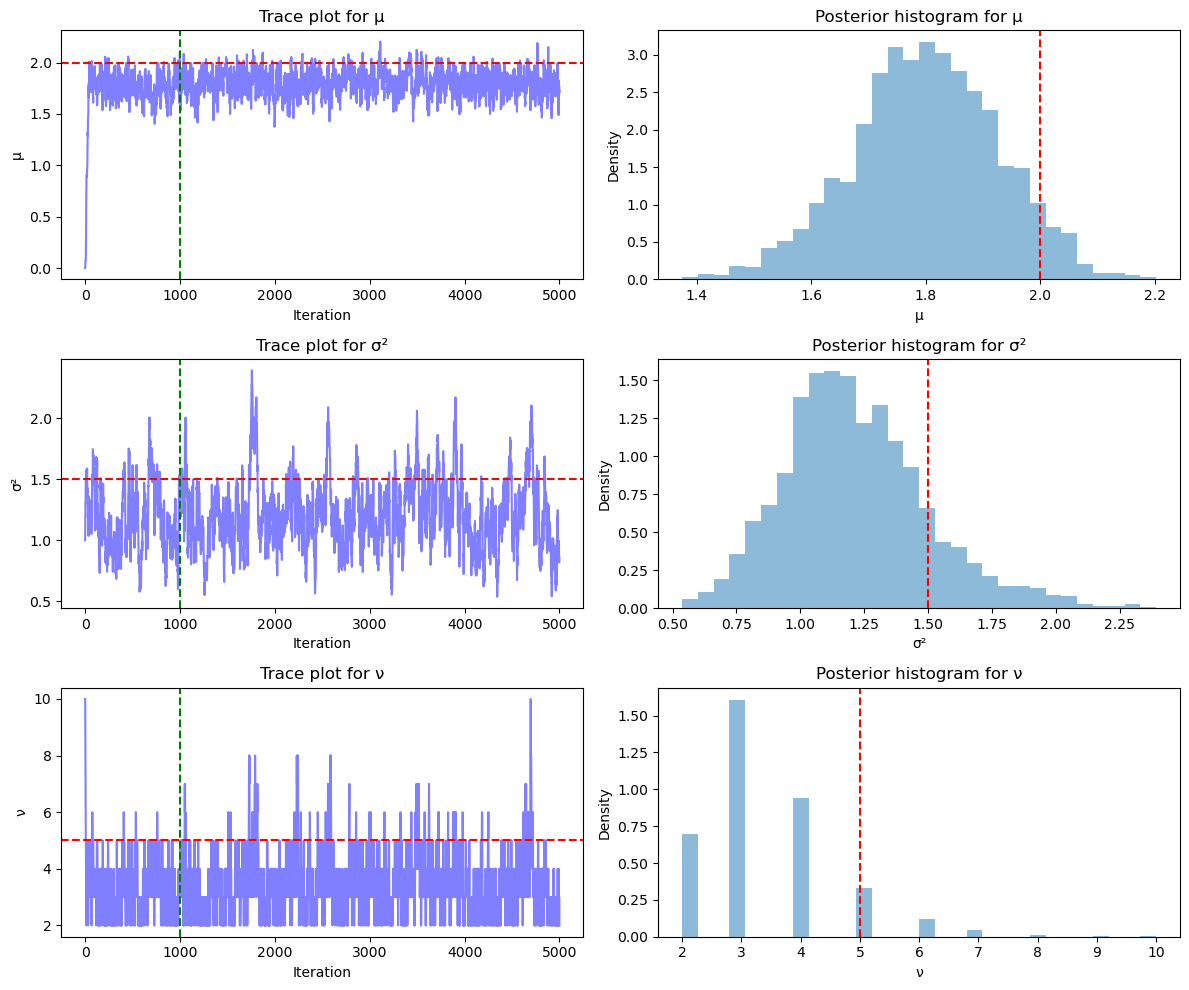

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data from a t-distribution
def generate_data(n=100, mu_true=0, sigma2_true=1, nu_true=3):
    return stats.t.rvs(df=nu_true, loc=mu_true, scale=np.sqrt(sigma2_true), size=n)

# Log likelihood for the location-scale-t distribution
def log_likelihood(x, mu, sigma2, nu):
    n = len(x)
    log_gamma_term = np.log(np.math.gamma((nu + 1) / 2)) - np.log(np.math.gamma(nu / 2))
    log_normalizing_constant = log_gamma_term - 0.5 * np.log(np.pi * nu * sigma2)
    
    log_kernel = -((nu + 1) / 2) * np.log(1 + (1 / nu) * ((x - mu) ** 2) / sigma2)
    
    return np.sum(log_normalizing_constant + log_kernel)

# Log prior for mu (normal)
def log_prior_mu(mu, mu0, tau0):
    return -0.5 * tau0 * (mu - mu0) ** 2 + 0.5 * np.log(tau0 / (2 * np.pi))

# Log prior for sigma2 (half-normal)
def log_prior_sigma2(sigma2, sigma0_2):
    if sigma2 <= 0:
        return -np.inf
    return -0.5 * (sigma2 ** 2) / sigma0_2 + 0.5 * np.log(2 / (np.pi * sigma0_2))

# Log prior for nu (discrete uniform over 1-100)
def log_prior_nu(nu):
    if nu >= 1 and nu <= 100 and nu == int(nu):
        return np.log(1/100)
    return -np.inf

# Full log posterior (up to a constant)
def log_posterior(x, mu, sigma2, nu, mu0, tau0, sigma0_2):
    return (log_likelihood(x, mu, sigma2, nu) + 
            log_prior_mu(mu, mu0, tau0) + 
            log_prior_sigma2(sigma2, sigma0_2) + 
            log_prior_nu(nu))

# Metropolis-within-Gibbs sampler
def metropolis_within_gibbs(x, n_samples=1000, mu0=0, tau0=1, sigma0_2=1,
                            mu_init=0, sigma2_init=1, nu_init=10):
    
    # Initialize storage for MCMC samples
    samples = np.zeros((n_samples, 3))  # mu, sigma2, nu
    
    # Initialize current values
    mu_current = mu_init
    sigma2_current = sigma2_init
    nu_current = nu_init
    
    # Initialize acceptance counters
    accepts = {'mu': 0, 'sigma2': 0, 'nu': 0}
    
    # Define proposal standard deviations
    mu_proposal_sd = 0.1
    sigma2_proposal_sd = 0.1
    
    # Run MCMC
    for i in tqdm(range(n_samples)):
        # Store current values
        samples[i, 0] = mu_current
        samples[i, 1] = sigma2_current
        samples[i, 2] = nu_current
        
        # 1. Update mu using Metropolis step
        mu_proposal = mu_current + np.random.normal(0, mu_proposal_sd)
        
        log_r = (log_likelihood(x, mu_proposal, sigma2_current, nu_current) + 
                 log_prior_mu(mu_proposal, mu0, tau0) - 
                 log_likelihood(x, mu_current, sigma2_current, nu_current) - 
                 log_prior_mu(mu_current, mu0, tau0))
        
        if np.log(np.random.uniform(0, 1)) < log_r:
            mu_current = mu_proposal
            accepts['mu'] += 1
        
        # 2. Update sigma2 using Metropolis step
        sigma2_proposal = sigma2_current + np.random.normal(0, sigma2_proposal_sd)
        
        if sigma2_proposal > 0:  # Ensure proposal is valid
            log_r = (log_likelihood(x, mu_current, sigma2_proposal, nu_current) + 
                     log_prior_sigma2(sigma2_proposal, sigma0_2) - 
                     log_likelihood(x, mu_current, sigma2_current, nu_current) - 
                     log_prior_sigma2(sigma2_current, sigma0_2))
            
            if np.log(np.random.uniform(0, 1)) < log_r:
                sigma2_current = sigma2_proposal
                accepts['sigma2'] += 1
        
        # 3. Update nu using Metropolis step with integer proposal
        nu_proposal = int(np.random.choice([nu_current-1, nu_current+1]))
        
        if 1 <= nu_proposal <= 100:  # Ensure proposal is valid
            log_r = (log_likelihood(x, mu_current, sigma2_current, nu_proposal) + 
                     log_prior_nu(nu_proposal) - 
                     log_likelihood(x, mu_current, sigma2_current, nu_current) - 
                     log_prior_nu(nu_current))
            
            if np.log(np.random.uniform(0, 1)) < log_r:
                nu_current = nu_proposal
                accepts['nu'] += 1
    
    # Calculate acceptance rates
    acceptance_rates = {k: v / n_samples for k, v in accepts.items()}
    
    return samples, acceptance_rates

# Run the sampler and analyze results
def run_mcmc_analysis(n=100, n_samples=5000, burn_in=1000, true_params=None):
    # Generate synthetic data
    if true_params is None:
        true_params = {'mu': 0, 'sigma2': 1, 'nu': 5}
    
    x = generate_data(n=n, mu_true=true_params['mu'], 
                     sigma2_true=true_params['sigma2'], 
                     nu_true=true_params['nu'])
    
    # Run MCMC
    samples, acceptance_rates = metropolis_within_gibbs(
        x, n_samples=n_samples, 
        mu_init=0, sigma2_init=1, nu_init=10
    )
    
    # Discard burn-in
    samples_post_burnin = samples[burn_in:, :]
    
    # Print results
    print(f"Acceptance rates: {acceptance_rates}")
    print(f"True parameters: μ={true_params['mu']}, σ²={true_params['sigma2']}, ν={true_params['nu']}")
    print(f"Posterior means: μ={samples_post_burnin[:, 0].mean():.4f}, "
          f"σ²={samples_post_burnin[:, 1].mean():.4f}, "
          f"ν={samples_post_burnin[:, 2].mean():.4f}")
    
    # Plot trace plots and histograms
    parameter_names = ['μ', 'σ²', 'ν']
    true_values = [true_params['mu'], true_params['sigma2'], true_params['nu']]
    
    fig, axes = plt.subplots(3, 2, figsize=(12, 10))
    
    for i, (name, true_val) in enumerate(zip(parameter_names, true_values)):
        # Trace plot
        axes[i, 0].plot(samples[:, i], 'b-', alpha=0.5)
        axes[i, 0].axhline(true_val, color='r', linestyle='--')
        axes[i, 0].axvline(burn_in, color='g', linestyle='--')
        axes[i, 0].set_title(f'Trace plot for {name}')
        axes[i, 0].set_xlabel('Iteration')
        axes[i, 0].set_ylabel(name)
        
        # Histogram
        axes[i, 1].hist(samples_post_burnin[:, i], bins=30, alpha=0.5, density=True)
        axes[i, 1].axvline(true_val, color='r', linestyle='--')
        axes[i, 1].set_title(f'Posterior histogram for {name}')
        axes[i, 1].set_xlabel(name)
        axes[i, 1].set_ylabel('Density')
    
    plt.tight_layout()
    plt.show()
    
    return samples, acceptance_rates, x

# Main function
if __name__ == "__main__":
    true_params = {'mu': 2, 'sigma2': 1.5, 'nu': 5}
    samples, acceptance_rates, data = run_mcmc_analysis(
        n=100, n_samples=5000, burn_in=1000, true_params=true_params
    )
    
    # Additional diagnostics could be added here
    # For example: Effective Sample Size, Gelman-Rubin diagnostic, etc.

### Q2: explore the role of sample size in providing inference for the degrees of freedom parameter $\nu$

*Implement the specification above using `PyMC` where you can explore inference on $\nu$ at different sample sizes. Provide a summarization and explanation of your findings.*

In [5]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed
np.random.seed(42)


In [6]:
# Function to generate data
def generate_data(n, mu=2, sigma2=1.5, nu=5):
    return stats.t.rvs(df=nu, loc=mu, scale=np.sqrt(sigma2), size=n)

# Define different sample sizes to test
sample_sizes = [50, 100, 500, 1000]

# Store generated datasets
datasets = {n: generate_data(n) for n in sample_sizes}


In [7]:
# Define the PyMC model
def run_pymc_inference(data):
    with pm.Model() as model:
        # Priors
        mu = pm.Normal("mu", mu=0, sigma=10)
        sigma = pm.HalfNormal("sigma", sigma=10)
        nu = pm.DiscreteUniform("nu", lower=1, upper=100)

        # Likelihood
        y_obs = pm.StudentT("y_obs", nu=nu, mu=mu, sigma=sigma, observed=data)

        # MCMC Inference
        trace = pm.sample(2000, tune=1000, return_inferencedata=True, target_accept=0.9)

    return trace


In [8]:
# Run MCMC for different sample sizes
traces = {n: run_pymc_inference(datasets[n]) for n in sample_sizes}


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [mu, sigma]
>Metropolis: [nu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 4 seconds.
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


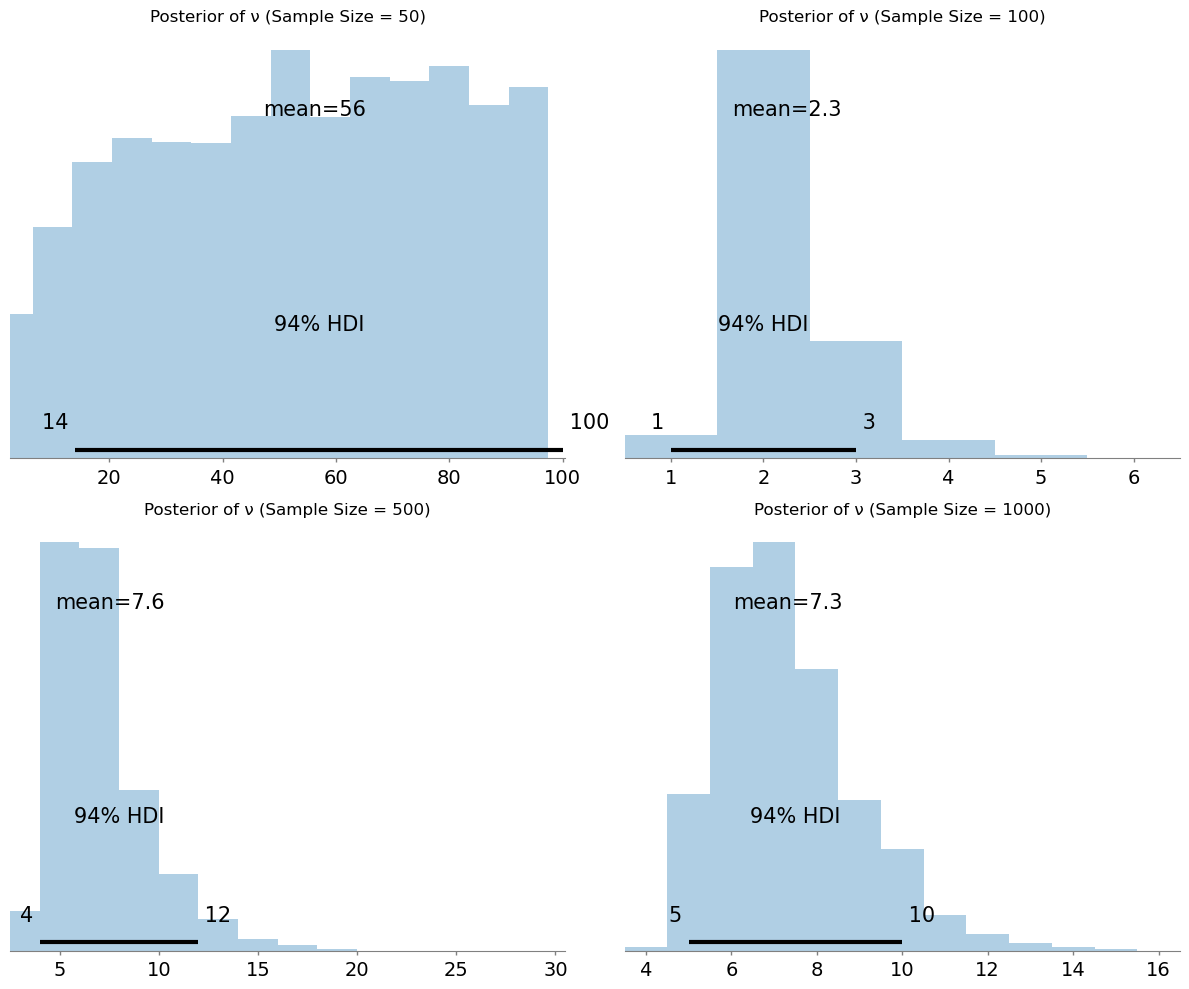

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (n, trace) in enumerate(traces.items()):
    az.plot_posterior(trace, var_names=["nu"], ax=axes[i])
    axes[i].set_title(f"Posterior of ν (Sample Size = {n})")

plt.tight_layout()
plt.show()


The plots above illustrate the posterior distributions of the degrees of freedom parameter for a t-distribution across four different samples sizes: 50, 100, 500, and 1000. It is noticeable that as the sample size increases, the posterior distribution becomes more concentrated, indicating increased certainty and precision in the estimation of v. 

In the small sample size of n=50, the posterior is highly uncertain as it spans nearly the entire prior range from 1 to 100. The mean estimate is also inflated which suggest that the mode is struggling to infer heavy tails. In the next sample, for n = 100, the posterior collapses around small values with a mean of 2.3 which suggests that the model favors heavy tails. For large sample sizes like n=500 and n=1000, the posterior is seemingly more concentrated around the truve value of v. The credible intervals are narrower, which suggests greater accuracy in the estimate. Likelihood dominates the prior which means that the inference is now driven by the data raterh than our prior beliefs. 

When n is small, the likelihood function does not provide enough information about v. The model is forced to rely on its prior which in this cae is a discrete uniform distribution. As the sample size increases the prior become irrelevant and the psoterior becomes data-driven which allows for distinguishing between heavy tails and normality. 

### Q3: the posterior predictive distribution does something like the following...

Let $p(\tau_i)$ be $\require{cancel} \textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \overset{\textrm{rate}\xcancel{\textrm{scale}}}{\beta = \frac{\nu}{2}}\big)$ and let $p(y_i|\tau_i)$ be $\textrm{N}(y_i | 0,\tau_i)$ and now integrate out the uncertainty in $\tau_i$ and see what distribution is left over for $y_i$.

*Go look at the gamma distribution and remember that you know that the integrals of unnormalized densities are the inverse of their normalizing constants. Then go look at the t distribution and determine what distribution the following expression defines. Then explain why the behavior demonstrated here is analagous to that of the posterior predictive distribution.*

$$\int p(y_i|\tau_i) p(\tau_i)  d\tau_i = \int \sqrt{\frac{\tau_i}{2\pi}}e^{-\frac{1}{2}\tau_i y_i^2} \frac {\frac{\nu}{2}^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu}{2}-1}e^{-\frac{\nu}{2}\tau_i} d\tau_i$$



Let $p(\tau_i)$ be $\textrm{gamma}\big(\tau_i | \alpha = \frac{\nu}{2}, \beta = \frac{\nu}{2}\big)$ and let $p(y_i|\tau_i)$ be $\textrm{N}(y_i | 0,\tau_i)$. We want to find the distribution of $y_i$ by integrating out $\tau_i$:

$$ \int p(y_i|\tau_i) p(\tau_i) d\tau_i = \int \sqrt{\frac{\tau_i}{2\pi}}e^{-\frac{1}{2}\tau_i y_i^2} \frac {\left(\frac{\nu}{2}\right)^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu}{2}-1}e^{-\frac{\nu}{2}\tau_i} d\tau_i $$

Let's rewrite the integral:

$$ \int \sqrt{\frac{\tau_i}{2\pi}}e^{-\frac{1}{2}\tau_i y_i^2} \frac {\left(\frac{\nu}{2}\right)^{\frac{\nu}{2}}}{\Gamma \left(\frac{\nu}{2}\right)} \tau_i^{\frac{\nu}{2}-1}e^{-\frac{\nu}{2}\tau_i} d\tau_i = \frac{\left(\frac{\nu}{2}\right)^{\frac{\nu}{2}}}{\sqrt{2\pi}\Gamma \left(\frac{\nu}{2}\right)} \int \tau_i^{\frac{\nu+1}{2}-1} e^{-\tau_i \left(\frac{y_i^2+\nu}{2}\right)} d\tau_i $$

Now, recognize that the integral is of the form:

$$ \int \tau_i^{\alpha-1} e^{-\beta \tau_i} d\tau_i $$

where $\alpha = \frac{\nu+1}{2}$ and $\beta = \frac{y_i^2+\nu}{2}$. This integral is the normalizing constant of a Gamma distribution, which is $\frac{\Gamma(\alpha)}{\beta^\alpha}$. Therefore,

$$ \int \tau_i^{\frac{\nu+1}{2}-1} e^{-\tau_i \left(\frac{y_i^2+\nu}{2}\right)} d\tau_i = \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\left(\frac{y_i^2+\nu}{2}\right)^{\frac{\nu+1}{2}}} $$

Substituting this back into the original expression, we get:

$$ \frac{\left(\frac{\nu}{2}\right)^{\frac{\nu}{2}}}{\sqrt{2\pi}\Gamma \left(\frac{\nu}{2}\right)} \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\left(\frac{y_i^2+\nu}{2}\right)^{\frac{\nu+1}{2}}} = \frac{\left(\frac{\nu}{2}\right)^{\frac{\nu}{2}} \Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{2\pi}\Gamma \left(\frac{\nu}{2}\right) \left(\frac{y_i^2+\nu}{2}\right)^{\frac{\nu+1}{2}}} $$

Simplifying further:

$$ \frac{\Gamma\left(\frac{\nu+1}{2}\right)}{\Gamma \left(\frac{\nu}{2}\right) \sqrt{\pi \nu}} \left(1 + \frac{y_i^2}{\nu}\right)^{-\frac{\nu+1}{2}} $$

This is the probability density function of a Student's t-distribution with $\nu$ degrees of freedom, location 0, and scale 1.


The behavior demonstrated here is analogous to that of the posterior predictive distribution because we are integrating out a parameter ($\tau_i$) to obtain the marginal distribution of the observed data ($y_i$). In the posterior predictive distribution, we integrate out the model parameters using their posterior distribution to obtain the predictive distribution of new data.

Specifically:

* $p(\tau_i)$ represents the prior distribution of the precision parameter $\tau_i$, which can be thought of as a simplified posterior.
* $p(y_i|\tau_i)$ represents the likelihood of the data given the precision parameter.
* Integrating out $\tau_i$ gives us the marginal distribution of $y_i$, which is the t-distribution.

In the posterior predictive context, we would have:

$$ p(y_{\textrm{new}} | y_{\textrm{observed}}) = \int p(y_{\textrm{new}} | \theta) p(\theta | y_{\textrm{observed}}) d\theta $$

where:

* $p(y_{\textrm{new}} | y_{\textrm{observed}})$ is the posterior predictive distribution.
* $p(y_{\textrm{new}} | \theta)$ is the likelihood of new data given the parameters.
* $p(\theta | y_{\textrm{observed}})$ is the posterior distribution of the parameters.

The process of integrating out the parameters to obtain the marginal distribution of the data is the same in both cases. Both show how uncertainty in parameters is propogated into uncertainty in the observations.